<a href="https://colab.research.google.com/github/Reichidad/Machine-Learning-2020-Spring-Class/blob/assignment02/assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02. Linear Regression
---
## 1. Input data
- I defined a **Linear Function** as $\hat{y} = ax + b$, where $a = 2, b = 25$
- I used **Numpy's Normal Distribution** for generate a set of $m$ point pairs $\{ (x^{(i)}, y^{(i)}) \}_{i = 1}^m$from random perturbations.
- I defined $m = 200$ number of points for the **Normal Distribution** where $mean = 0$ and $\sigma = 30$

## 2. Linear Regression : Model
- Must describe about **Linear Regression Model**.

## 3. Linear Regression : Objective Function
- Must describe about **Objective Function**.

## 4. Linear Regression : Gradient Descent
- Must describe about **Gradient Descent**.

## 5. Code & Results Plotting

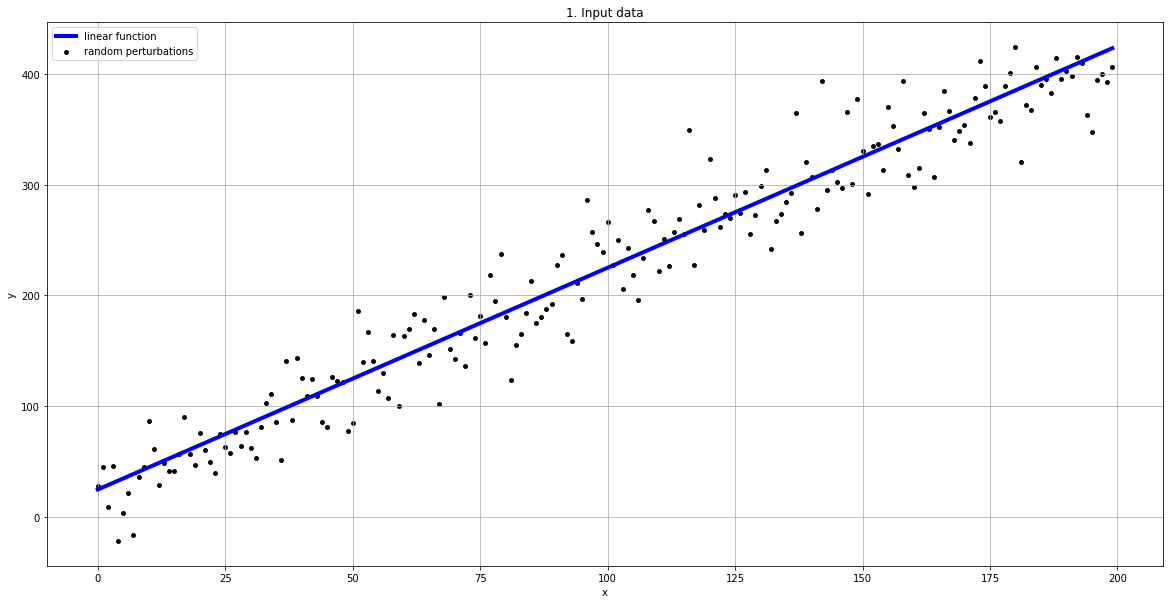

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import random

# generate input data
# for the given assignment requirements

# y_hat = ax + b, line definition
a = 2
b= 25
m = 200
x = [i for i in range(m)]
y_hat = [a*i + b for i in x]

# y = y_hat + n where n~N(0, sigma ** 2)
mean = 0
sigma = 30
n = np.random.normal(mean, sigma, size = m)
y = []

for i in range(m):
  y.append(y_hat[i] + n[i])

# 1. Input data
# a straight line that is the graph of a linear function (in blue color)
# a set of points that have random perturbations
# with respect to the straight line (in black color)
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.grid'] = True

plt.title("1. Input data")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y_hat, c='b', label="linear function")
plt.scatter(x, y, c='k', s=15, label="random perturbations")
plt.legend()
plt.show()

